# Classifier
**2301212317_LeiCheng_Fintech**

In [100]:
import pandas as pd
import numpy as np

In [101]:
# data_training = pd.read_csv('../HW_1_Classifier/GiveMeSomeCredit/cs-training.csv')
data_training = pd.read_csv('/home/lcheng/Classify/cs-training.csv')

In [102]:
data_training

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


## Data Preprocessing

In [103]:
data_training.drop(data_training.columns[0], axis=1,inplace=True)
data_training.columns = ['Default'] + ['X'+str(i) for i in range(1,11)]

In [104]:
data_training.describe()

,Default,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [105]:
#Fill-in the missing values (`nan`) with the column means
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data_imp = imp_mean.fit_transform(data_training.values)

In [106]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features (X) and target variable (y)
X, y = data_imp[:, 1:], data_imp[:, 0]

# test_size=0.3 specifies the proportion of the dataset to include in the test split
# random_state=0 sets the random seed for reproducibility of results
# stratify=y ensures that the distribution of the target variable is preserved in both the training and testing sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)


In [107]:
from sklearn.preprocessing import StandardScaler

# Creating a StandardScaler object
stdsc = StandardScaler()

# use Z-score method to preprocess the train and test data
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)


In [108]:
X_test_std


array([[-1.87490702e-02, -2.20729509e-01,  1.39606666e-01, ...,
         8.62626774e-01,  1.84700090e-01, -6.87987280e-01],
       [-2.25432441e-02, -8.52017711e-02, -1.00381218e-01, ...,
         8.62626774e-01, -5.74947479e-02, -2.15607607e-03],
       [-2.22890413e-02, -2.20729509e-01, -1.00381218e-01, ...,
         2.62319224e+00, -5.74947479e-02,  1.12345233e+00],
       ...,
       [-2.02827664e-02, -1.74379023e-02,  3.79594551e-01, ...,
         2.62319224e+00,  4.26894928e-01,  1.12345233e+00],
       [-2.14604827e-02,  1.06678400e+00, -1.00381218e-01, ...,
        -8.97938687e-01, -5.74947479e-02, -6.87987280e-01],
       [-2.26189331e-02,  1.33783948e+00, -1.00381218e-01, ...,
        -8.97938687e-01, -5.74947479e-02, -6.87987280e-01]])

In [109]:
X_train_std

array([[-0.02238028,  0.59243692, -0.10038122, ..., -0.01765596,
        -0.05749475,  0.21773252],
       [-0.02261352,  1.066784  , -0.10038122, ..., -0.89793869,
        -0.05749475, -0.68798728],
       [-0.02012583, -1.23718754, -0.10038122, ..., -0.89793869,
        -0.05749475, -0.68798728],
       ...,
       [-0.02178881, -0.08520177, -0.10038122, ...,  0.86262677,
        -0.05749475, -0.68798728],
       [-0.02112788,  0.11808984, -0.10038122, ..., -0.01765596,
        -0.05749475,  1.12345233],
       [-0.01986448, -0.96613207, -0.10038122, ..., -0.01765596,
        -0.05749475,  1.12345233]])

In [110]:
X_test_std.shape

(45000, 10)

In [13]:
X_train_std.shape

(105000, 10)

## Derive the most two important features by Logisitc Regression with L1 Penalty

In [111]:
from sklearn.linear_model import LogisticRegression

# C: Inverse of regularization strength, controls model complexity. Smaller C value indicates stronger regularization.
# random_state: Random seed for initializing the model's random state.
# penalty: Penalty term, using L1 regularization (Lasso) in this case.
# solver: Solver algorithm for optimization. 'saga' is chosen, suitable for large datasets.
# tol: Tolerance for stopping criteria of the solver algorithm.
def LR_l1(C):
    global lr
    lr = LogisticRegression(C = C, random_state=10, penalty='l1', solver='saga', tol=0.01)
    lr.fit(X_train_std, y_train)
    return lr.coef_

print(LR_l1(0.001))
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))


[[ 0.         -0.28746361  0.11424644  0.          0.          0.
   0.          0.          0.          0.        ]]
Training accuracy: 0.9331619047619047
Test accuracy: 0.9331777777777778


In [113]:
for C in np.linspace(0.01,0.001,10):
    lr_coef = LR_l1(C)
    if len(lr_coef[lr_coef != 0]) == 2:
        print(C,lr_coef)
        break

0.001 [[ 0.         -0.28746361  0.11424644  0.          0.          0.
   0.          0.          0.          0.        ]]


In [114]:
# redefine X_train_std and X_test_std
X_train_std = X_train_std[:, lr.coef_[0]!=0]
X_test_std = X_test_std[:, lr.coef_[0]!=0]

In [115]:
X_train_std

array([[ 0.59243692, -0.10038122],
       [ 1.066784  , -0.10038122],
       [-1.23718754, -0.10038122],
       ...,
       [-0.08520177, -0.10038122],
       [ 0.11808984, -0.10038122],
       [-0.96613207, -0.10038122]])

In [116]:
X_test_std

array([[-0.22072951,  0.13960667],
       [-0.08520177, -0.10038122],
       [-0.22072951, -0.10038122],
       ...,
       [-0.0174379 ,  0.37959455],
       [ 1.066784  , -0.10038122],
       [ 1.33783948, -0.10038122]])

## Apply LR / SVM / Decision Tree to do the classification

In [117]:
#LR: Logistic Regression
def LR(C):
    lr = LogisticRegression(C = C, random_state=1, solver='saga', tol=0.01)
    lr.fit(X_train_std, y_train)
    return [C,lr.score(X_train_std, y_train),lr.score(X_test_std, y_test)]

for C in [10,1,0.1,0.001,0.0001,0.00001,0.000001]:
    print(LR(C))

[10, 0.9333523809523809, 0.9332666666666667]
[1, 0.9333523809523809, 0.9332666666666667]
[0.1, 0.9333523809523809, 0.9332666666666667]
[0.001, 0.9333523809523809, 0.9332666666666667]
[0.0001, 0.9331809523809523, 0.9331777777777778]
[1e-05, 0.9331619047619047, 0.9331555555555555]
[1e-06, 0.9331619047619047, 0.9331555555555555]


In [94]:
#SVM: Support Vector Machines
from sklearn.svm import SVC
def SVM(C):
    svm = SVC(kernel = 'linear', 
              C = C,
              random_state=1)
    svm.fit(X_train_std, y_train)
    return [C,svm.score(X_train_std, y_train),svm.score(X_test_std, y_test)]

# SVM(1)
# for C in [10,1,0.1,0.001,0.0001]:
#     print(SVM(C))

[10, 0.9331619047619047, 0.9331555555555555]
[1, 0.9331619047619047, 0.9331555555555555]
[0.1, 0.9331619047619047, 0.9331555555555555]
[0.001, 0.9331619047619047, 0.9331555555555555]
[0.0001, 0.9331619047619047, 0.9331555555555555]


In [119]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

def DecisionTree(max_depth):
    DecisionTree = DecisionTreeClassifier(criterion='gini',
                                          max_depth=max_depth,
                                          random_state=1)
    DecisionTree.fit(X_train_std, y_train)
    return [max_depth, DecisionTree.score(X_train_std, y_train), DecisionTree.score(X_test_std, y_test)]

for max_depth in range(1,30,3):
    print(DecisionTree(max_depth=max_depth))

[1, 0.9331619047619047, 0.9331555555555555]
[4, 0.9335809523809524, 0.9333555555555556]
[7, 0.9339142857142857, 0.9334]
[10, 0.9342857142857143, 0.9332444444444444]
[13, 0.9346952380952381, 0.9333111111111111]
[16, 0.9348952380952381, 0.9334]
[19, 0.9349238095238095, 0.9334]
[22, 0.9349238095238095, 0.9334]
[25, 0.9349238095238095, 0.9334]
[28, 0.9349238095238095, 0.9334]


## Visualize  classifiers using the `plot_decision_regions` function

In [120]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.1):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    print(xx1.shape)
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='g',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [122]:
lr = LogisticRegression(C = 0.001, 
                        random_state=1, 
                        solver='saga', 
                        tol=0.01)
lr.fit(X_train_std,y_train)


LogisticRegression(C=0.001, random_state=1, solver='saga', tol=0.01)

In [142]:
svm = SVC(kernel = 'linear', 
              C = 1,
              random_state=1)
svm.fit(X_train_std,y_train)

In [124]:
decisionTree = DecisionTreeClassifier(criterion='gini',
                                    max_depth=4,
                                    random_state=1)
decisionTree.fit(X_train_std,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

(256, 94)


/tmp/ipykernel_2924/2301821036.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


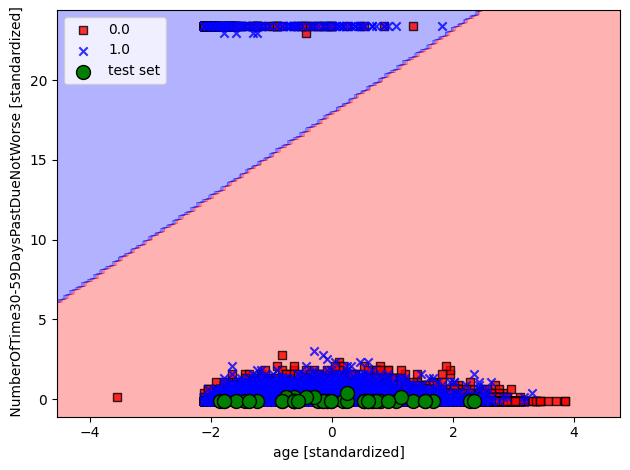

In [125]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=lr, test_idx=range(0, 50))
plt.xlabel('age [standardized]')
plt.ylabel(' NumberOfTime30-59DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

(256, 94)


/tmp/ipykernel_2924/2301821036.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


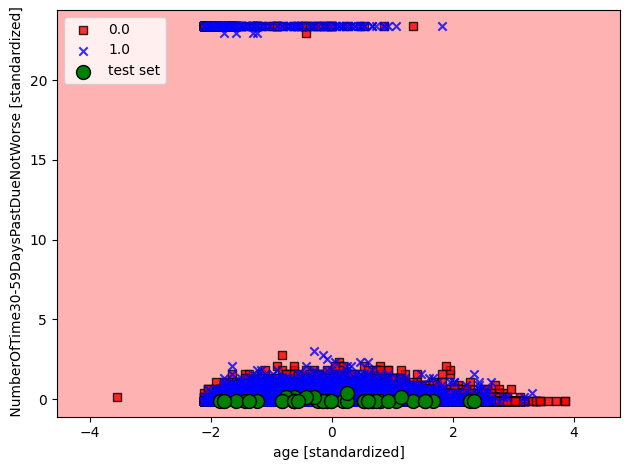

In [126]:
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=svm, test_idx=range(0, 50))
plt.xlabel('age [standardized]')
plt.ylabel(' NumberOfTime30-59DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

(256, 94)


/tmp/ipykernel_2924/2301821036.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


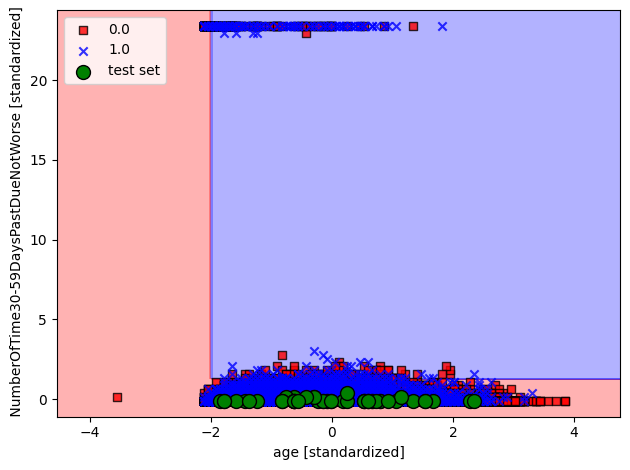

In [127]:
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=decisionTree, test_idx=range(0, 50))
plt.xlabel('age [standardized]')
plt.ylabel(' NumberOfTime30-59DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## since there are some outliers causing the plot unclear, we cut those outliers out and plot again

In [128]:
X_y_combined_std_cut = pd.DataFrame( X_combined_std,y_combined)
X_y_combined_std_cut.reset_index(inplace=True)
X_y_combined_std_cut.columns = ['y','X0','X1']

In [130]:
X_y_combined_std_cut=X_y_combined_std_cut[(X_y_combined_std_cut['X1'] <5) & (X_y_combined_std_cut['X0'] >-3)]

In [131]:
X_y_combined_std_cut

,y,X0,X1
0,0.0,0.592437,-0.100381
1,0.0,1.066784,-0.100381
2,0.0,-1.237188,-0.100381
3,0.0,0.592437,-0.100381
4,0.0,-0.085202,-0.100381
...,...,...,...
149995,0.0,-1.914826,-0.100381
149996,0.0,0.253618,-0.100381
149997,0.0,-0.017438,0.379595
149998,0.0,1.066784,-0.100381


In [132]:
X_combined_std_cut = X_y_combined_std_cut.values[:,1:]
y_combined_cut = X_y_combined_std_cut.values[:,0]

In [135]:
X_combined_std_cut

array([[ 0.59243692, -0.10038122],
       [ 1.066784  , -0.10038122],
       [-1.23718754, -0.10038122],
       ...,
       [-0.0174379 ,  0.37959455],
       [ 1.066784  , -0.10038122],
       [ 1.33783948, -0.10038122]])

In [136]:
y_combined_cut

array([0., 0., 0., ..., 0., 0., 0.])

(52, 80)


/tmp/ipykernel_2924/2301821036.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


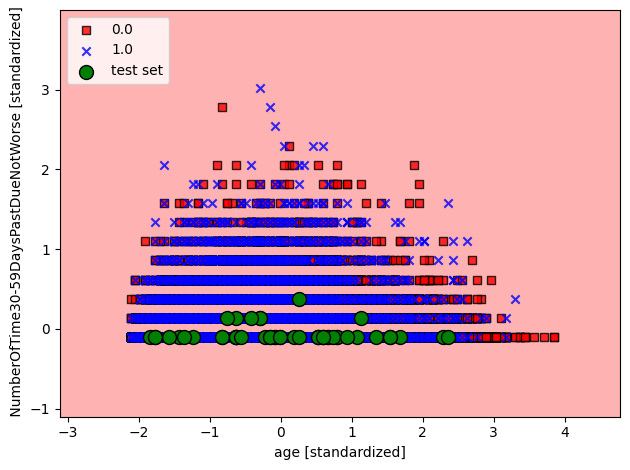

In [139]:
plot_decision_regions(X=X_combined_std_cut, y=y_combined_cut,
                      classifier=lr, test_idx=range(0, 50))
plt.xlabel('age [standardized]')
plt.ylabel(' NumberOfTime30-59DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

(52, 80)


/tmp/ipykernel_2924/2301821036.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


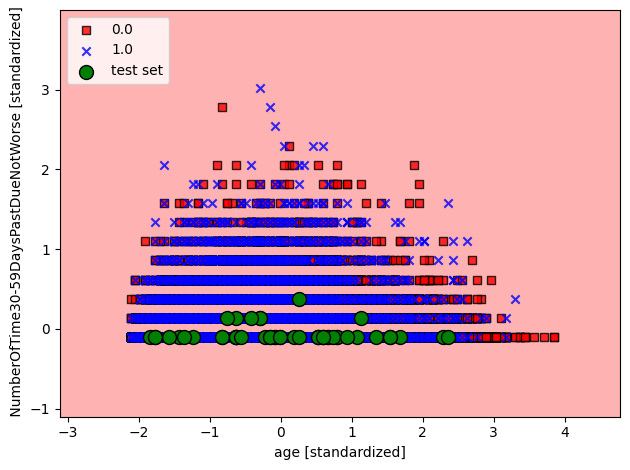

In [140]:
plot_decision_regions(X=X_combined_std_cut, y=y_combined_cut,
                      classifier=svm, test_idx=range(0, 50))
plt.xlabel('age [standardized]')
plt.ylabel(' NumberOfTime30-59DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

(52, 80)


/tmp/ipykernel_2924/2301821036.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


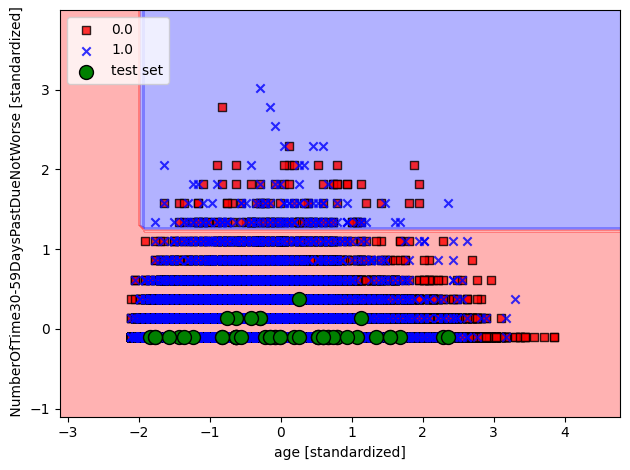

In [141]:
plot_decision_regions(X=X_combined_std_cut, y=y_combined_cut,
                      classifier=decisionTree, test_idx=range(0, 50))
plt.xlabel('age [standardized]')
plt.ylabel(' NumberOfTime30-59DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()